# Importing Essential Libraries

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
df = pd.read_csv("language.csv")
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


# Data Cleaning

In [16]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [17]:
df['language'].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

In [18]:
## we'll make a array of Text and language

x = np.array(df['Text'])
y = np.array(df['language'])

In [19]:
print(x)

['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'
 'sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris '
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม'
 ...
 'con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en  guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el h

In [20]:
print(y)

['Estonian' 'Swedish' 'Thai' ... 'Spanish' 'Chinese' 'Romanian']


# Text Preprocessing

In [21]:
## We'll make a object of CountVectorizer
## CountVectorizer => Convert a collection of text documents to a matrix of token counts

cv = CountVectorizer()
X = cv.fit_transform(x)

In [22]:
## Dependent and Indepedent variable

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.33,random_state = 42)

# Build Model

In [23]:
# We'll make model
# Train the MultinomialBNB models
# Multinomaial => The multinomial Naive Bayes classifier is suitable for classification with discrete features.
# (e.g., word counts for text classification)

model = MultinomialNB()

model.fit(X_train,y_train)

MultinomialNB()

In [24]:
# We'll Initialize The  Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# We'll Initialize The LogisticRegression model
Log_Reg = LogisticRegression()

# Train the model

Log_Reg.fit(X_train,y_train)

LogisticRegression()

# Evaluation

In [26]:
# Accuracy of models

print("Accuracy of MultinomialNB :==> ",model.score(X_test,y_test))
print("Accuracy of Decision Tree Classifier :==> ",dt_model.score(X_test,y_test))
print("Accuracy of Logistic Regression :==> ",Log_Reg.score(X_test,y_test))

Accuracy of MultinomialNB :==>  0.953168044077135
Accuracy of Decision Tree Classifier :==>  0.8950413223140495
Accuracy of Logistic Regression :==>  0.9424242424242424


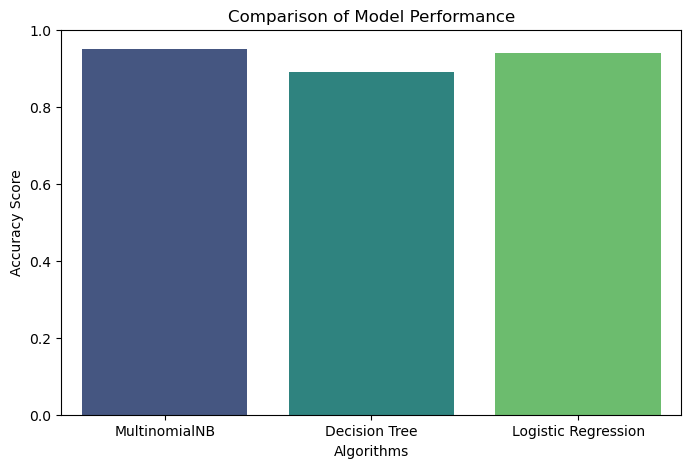

In [29]:
# Model names
models = ['MultinomialNB','Decision Tree','Logistic Regression']

# Corresponding accuracy scores (example values)
accuracy_scores = [0.95,0.89,0.94]

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_scores, palette="viridis")

# Add labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Performance")
plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1
plt.show()

In [30]:
# Users will give Input and now we'll predict the language

user = input("Enter a text:--> ")
data = cv.transform([user]).toarray()

output = model.predict(data)
print(output)

Enter a text:--> what is your name ?
['English']
